<a href="https://colab.research.google.com/github/StrangeAI96/Machine-Learning-and-Deep-Learning-With-Python/blob/main/Machine_%26_Deep_Learning_Course_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear and Polynomial Regression model
# Introduction:
This Python script, demonstrates the application of **linear and polynomial regression** models to predict a continuous target variable based on a given dataset.

# 1. Importing the Required Libraries

In this part, the necessary Python libraries are imported. These include libraries such as numpy, pandas, and matplotlib for numerical operations and visualization.

In [ ]:
# Importing the libraries
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd

# 2. Loading the Dataset & Data Preprocessing

Here the dataset used for machine learning and deep learning tasks is loaded. Depending on the project, this dataset come from a local file (e.g., CSV). The dataset contains the input features and target labels that will be used to train and evaluate the model.

Before training a model, the dataset must be preprocessed. This step may involve:

* Handling missing values.

* Normalizing or standardizing the features.

* Encoding categorical variables.

* Splitting the dataset into training and testing subsets.

Preprocessing ensures that the data is clean, numerical, and properly structured for machine learning and deep learning algorithms.

In [ ]:
# Importing files
from google.colab import files
upload = files.upload()

Saving Dataset_1_test.csv to Dataset_1_test (1).csv
Saving Dataset_1_train.csv to Dataset_1_train (1).csv
Saving Dataset_1_valid.csv to Dataset_1_valid (1).csv


In [ ]:
# Reading Training file
file1 = pd.read_csv('Dataset_1_train.csv', header = None)
train = file1.iloc[:, [0, 1]].to_numpy() # making sure the matrix has only 2 column
print('Shape:', train.shape)

Shape: (50, 2)


In [ ]:
# Reading Validation file and printing it
file2 = pd.read_csv('Dataset_1_valid.csv', header = None)
valid = file2.iloc[:, [0, 1]].to_numpy() # making sure the matrix has only 2 column
print('Shape:',valid.shape)

Shape: (50, 2)


In [ ]:
# Reading Test file and printing it
file3 = pd.read_csv('Dataset_1_test.csv', header = None)
test = file3.iloc[:, [0, 1]].to_numpy() # making sure the matrix has only 2 column
print('Shape:',test.shape)

Shape: (50, 2)


# 3. Linear Regression
**First we are going to use linear regression model**

In this part we are using the traditional formula for w0 & w1

This part presents a visualization of the training datasets together with the predictions produced by the linear model. In each dataset, the true data points are represented as scatter plots, while the model’s predictions are plotted as continuous lines. By examining these plots, it becomes possible to evaluate how closely the model captures the training data and how well it generalizes to the validation and test sets. Misalignments between the scatter points and the prediction lines highlight differences in the model’s accuracy across the various datasets.

**for Root Mean Square Error(RMSE) we creat a funcrion called RMSE**

Training RMSE is: 5.393721


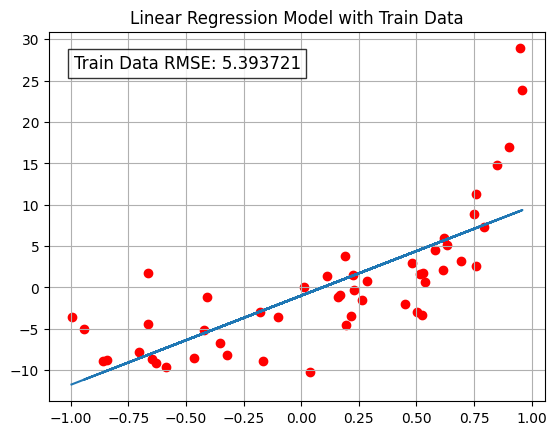

In [ ]:
x_train = train[ : , 0] # Extracting the first column into x_train
y_train = train[ : , 1] # Extracting the first column into y_train

n = len(x_train)
xi = np.sum(x_train)
yi = np.sum(y_train)
xi2 = np.sum(x_train**2)
xiyi = np.sum(x_train*y_train)

w1 = (n*xiyi-xi*yi)/(n*xi2-xi**2)
w0 = (yi-w1*xi)/n
y_pred_train = w1*x_train + w0

# RMSE Function
def RMSE (y_pred, y):
  return np.sqrt(np.mean((y_pred - y)**2))

print('Training RMSE is: %f' % RMSE(y_pred_train, y_train))

# Ploting the results
plt.text(0.05, 0.9, f'Train Data RMSE: {RMSE(y_pred_train, y_train):.6f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
plt.plot(x_train, y_pred_train)
plt.scatter(x_train, y_train, color='red')
plt.title('Linear Regression Model with Train Data')
plt.grid(True)
plt.show()

This section visualizes the validation datasets along with the predictions from the linear model.


Validation RMSE is: 5.893111


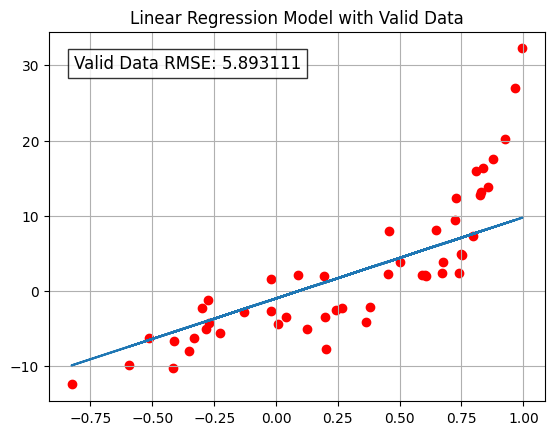

In [ ]:
x_valid = valid[ : , 0] # Extracting the first column into x_valid
y_valid = valid[ : , 1] # Extracting the first column into y_valid
y_pred_valid = w1*x_valid + w0

print('Validation RMSE is: %f' % RMSE(y_pred_valid,y_valid))

# Ploting the results
plt.text(0.05, 0.9, f'Valid Data RMSE: {RMSE(y_pred_valid,y_valid):.6f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
plt.plot(x_valid, y_pred_valid)
plt.scatter(x_valid, y_valid, color='red')
plt.title('Linear Regression Model with Valid Data')
plt.grid(True)
plt.show()

This section visualizes the test datasets along with the predictions from the linear model.

Test RMSE is: 5.034293


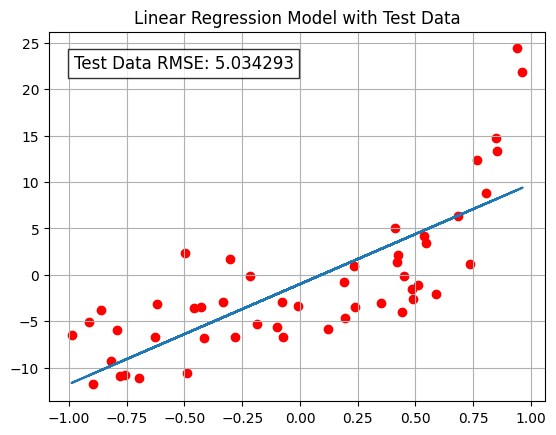

In [ ]:
x_test = test[ : , 0] # Extracting the first column into x_test
y_test = test[ : , 1] # Extracting the first column into y_test
y_pred_test = w1*x_test + w0

print('Test RMSE is: %f' % RMSE(y_pred_test,y_test) )

# Ploting the results
plt.text(0.05, 0.9, f'Test Data RMSE: {RMSE(y_pred_test,y_test):.6f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
plt.plot(x_test, y_pred_test)
plt.scatter(x_test, y_test, color='red')
plt.title('Linear Regression Model with Test Data')
plt.grid(True)
plt.show()

**In this three plot above we have shown that no matter what is the input, because we have the same w matrix y_prediction line will be the same**

# 4. Polynomial Regression

In this part, we use a matrix equation to obtain the matrix w:

 $ w = (X^T X)^{-1} X^T y $

This part explores the behavior of polynomial regression models with degrees ranging from 1 to 10 on both training and validation datasets. For every chosen degree D, polynomial features are generated, the model is trained on the training data, and the RMSE is computed for both datasets. These RMSE values are then plotted against the polynomial degree to observe how the error evolves as the degree increases.

The plot reveals a steady decline in training RMSE as the polynomial degree rises, suggesting that higher-degree polynomials capture the training data more precisely. In contrast, the RMSE for the validation set initially drops, reaching its lowest point around degree 4, before gradually increasing with higher degrees. This trend suggests that polynomials beyond degree 4 start overfitting, modeling random noise rather than underlying patterns, which negatively impacts performance on unseen data. Hence, a polynomial of degree 4 seems to offer the best compromise, providing an accurate fit for training data while maintaining reliable validation performance.

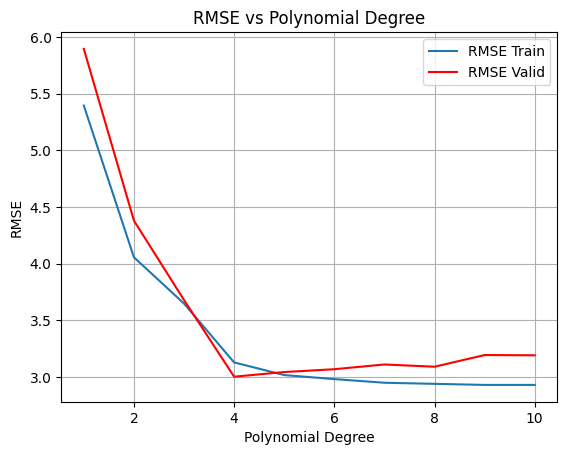

RMSE Train for degree 1: 5.3937
RMSE Train for degree 2: 4.0570
RMSE Train for degree 3: 3.6490
RMSE Train for degree 4: 3.1304
RMSE Train for degree 5: 3.0190
RMSE Train for degree 6: 2.9833
RMSE Train for degree 7: 2.9513
RMSE Train for degree 8: 2.9417
RMSE Train for degree 9: 2.9321
RMSE Train for degree 10: 2.9321
--------------------------------
RMSE Valid for degree 1: 5.8931
RMSE Valid for degree 2: 4.3801
RMSE Valid for degree 3: 3.6801
RMSE Valid for degree 4: 3.0047
RMSE Valid for degree 5: 3.0456
RMSE Valid for degree 6: 3.0706
RMSE Valid for degree 7: 3.1123
RMSE Valid for degree 8: 3.0924
RMSE Valid for degree 9: 3.1954
RMSE Valid for degree 10: 3.1931


In [ ]:
x_train = train[ : , 0] # Extracting the first column into x_train
y_train = train[ : , 1] # Extracting the first column into y_train

x_valid = valid[ : , 0] # Extracting the first column into x_valid
y_valid = valid[ : , 1] # Extracting the first column into y_valid

x_test = test[ : , 0] # Extracting the first column into x_test
y_test = test[ : , 1] # Extracting the first column into y_test

x_train_poly = np.c_[np.ones(len(x_train))] # preapering x_train for matrix equation
x_valid_poly = np.c_[np.ones(len(x_valid))] # preapering x_valid for matrix equation

D = 10 # polynomial degree
rmse_train = np.zeros((D, 1)) # creating a matrix for rmse_train
rmse_valid = np.zeros((D, 1)) # creating a matrix for rmse_valid

for i in range(1, D+1):
  x_train_poly = np.c_[x_train_poly, x_train**i]
  x_valid_poly = np.c_[x_valid_poly, x_valid**i]

  w_poly = la.inv(x_train_poly.T.dot(x_train_poly)).dot(x_train_poly.T).dot(y_train) # we only have one w matrix which has obtained from training data

  y_pred_train_poly = x_train_poly.dot(w_poly) # obtaining y_prediction for polynomial regression(training data)
  y_pred_valid_poly = x_valid_poly.dot(w_poly) # obtaining y_prediction for polynomial regression(validation data)

  rmse_train[i-1, 0] = RMSE(y_pred_train_poly, y_train) # Storing the RMSE results for each polynomial degree in a separate row of a matrix.(Train Data)
  rmse_valid[i-1, 0] = RMSE(y_pred_valid_poly, y_valid) # Storing the RMSE results for each polynomial degree in a separate row of a matrix.(Valid Data)

# Ploting the results
plt.plot(range(1, D+1), rmse_train, label='RMSE Train')
plt.plot(range(1, D+1), rmse_valid, label='RMSE Valid', color='red')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

# Displaying RMSE Results for Various Polynomial Degrees(Train Data)
for j in range(D):
    print("RMSE Train for degree %d: %.4f" % (j+1, rmse_train[j, 0]))
print('--------------------------------')
# Displaying RMSE Results for Various Polynomial Degrees(Valid Data)
for k in range(D):
    print("RMSE Valid for degree %d: %.4f" % (k+1, rmse_valid[k, 0]))

In [ ]:
D_best = 4 # best polynomial degree

rmse_test = np.zeros((D_best, 1)) # creating a matrix for rmse_test

x_train_poly = np.c_[np.ones(len(x_train))] # preapering x_train for matrix equation
x_test_poly = np.c_[np.ones(len(x_test))] # preapering x_valid for matrix equation

for i in range(1, D_best+1):
  x_train_poly = np.c_[x_train_poly, x_train**i]
  x_test_poly = np.c_[x_test_poly, x_test**i]

  w_poly = la.inv(x_train_poly.T.dot(x_train_poly)).dot(x_train_poly.T).dot(y_train) # we only have one w matrix which has obtained from training data
  y_pred_train_poly = x_train_poly.dot(w_poly) # obtaining y_prediction for polynomial regression(training data)
  y_pred_test_poly = x_test_poly.dot(w_poly) # obtaining y_prediction for polynomial regression(test data)

  rmse_test[i-1, 0] = RMSE(y_pred_test_poly, y_test) # Storing the RMSE results for each polynomial degree in a separate row of a matrix.(Test Data)

# Displaying RMSE Results for Various Polynomial Degrees(Test Data)
for u in range(D_best):
    print("RMSE Test for degree %d: %.4f" % (u+1, rmse_test[u, 0]))

RMSE Test for degree 1: 5.0343
RMSE Test for degree 2: 4.1484
RMSE Test for degree 3: 3.4131
RMSE Test for degree 4: 3.2176


This code implements a polynomial regression model of degree 4 on the provided dataset. It starts by generating polynomial features for the training data, including a bias term, and computes the weight vector using the closed-form solution of linear regression. These plots provide insight into how effectively the polynomial model captures the training data patterns and how well it generalizes to new, unseen data.

**1: Training Data**

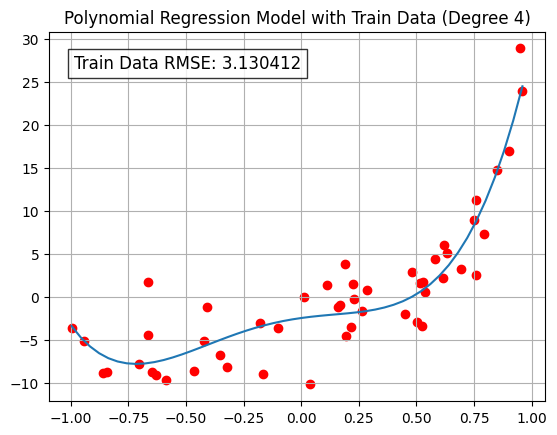

In [ ]:
# we define new node for ploting because we can't use train data directly for plot
x_fit = np.linspace(np.min(x_train), np.max(x_train))
x_fit_train = np.c_[np.ones(len(x_fit))]

for i in range(1, D_best+1):
  x_fit_train = np.c_[x_fit_train, x_fit**i]

y_fit_train = x_fit_train.dot(w_poly)

plt.text(0.05, 0.9, f'Train Data RMSE: {rmse_train[D_best-1, 0]:.6f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
plt.scatter(x_train, y_train, color='red')
plt.plot(x_fit, y_fit_train)
plt.title('Polynomial Regression Model with Train Data (Degree 4)')
plt.grid(True)
plt.show()

**2: Validation Data**

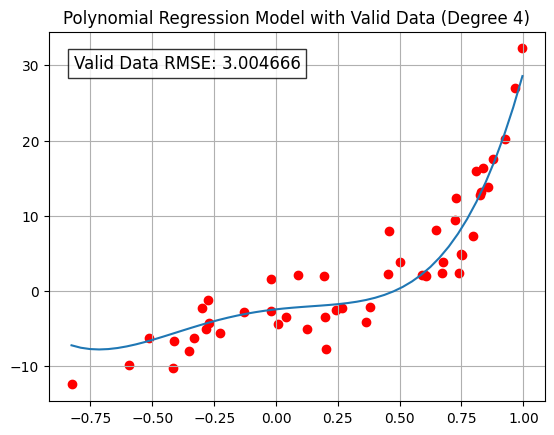

In [ ]:
# we define new node for ploting because we can't use valid data directly for plot
x_fit = np.linspace(np.min(x_valid), np.max(x_valid))
x_fit_valid = np.c_[np.ones(len(x_fit))]

for i in range(1, D_best+1):
  x_fit_valid = np.c_[x_fit_valid, x_fit**i]

y_fit_valid = x_fit_valid.dot(w_poly)

plt.text(0.05, 0.9, f'Valid Data RMSE: {rmse_valid[D_best-1, 0]:.6f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
plt.scatter(x_valid, y_valid, color='red')
plt.plot(x_fit, y_fit_valid)
plt.title('Polynomial Regression Model with Valid Data (Degree 4)')
plt.grid(True)
plt.show()

**3: Test Data**

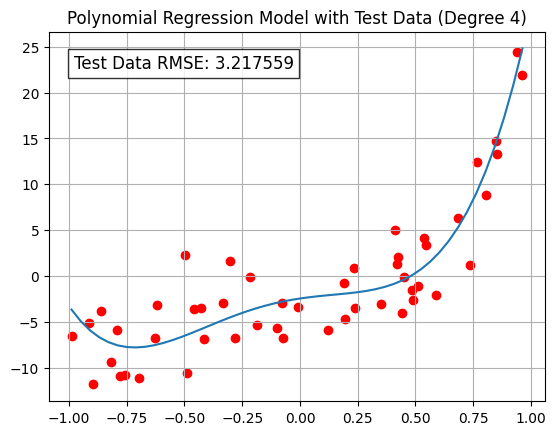

In [ ]:
# we define new node for ploting because we can't use test data directly for plot
x_fit = np.linspace(np.min(x_test), np.max(x_test))
x_fit_test = np.c_[np.ones(len(x_fit))]

for i in range(1, D_best+1):
  x_fit_test = np.c_[x_fit_test, x_fit**i]

y_fit_test = x_fit_test.dot(w_poly)

plt.text(0.05, 0.9, f'Test Data RMSE: {rmse_test[D_best-1, 0]:.6f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
plt.scatter(x_test, y_test, color='red')
plt.plot(x_fit, y_fit_test)
plt.title('Polynomial Regression Model with Test Data (Degree 4)')
plt.grid(True)
plt.show()

# Conclusion

The degree-4 polynomial regression model effectively captures the underlying nonlinear relationship between inputs and outputs in the training data. The fitted curve closely traces the distribution of the training points, showing that the model successfully minimizes training error.

When evaluated on the validation set, the model preserves a similar trend, demonstrating strong generalization ability. The close alignment between validation points and the predicted curve indicates that overfitting is minimal, and the model maintains accuracy on unseen data from the same distribution.

On the test set, the fitted curve continues to represent the underlying functional relationship, though with slightly larger deviations in some areas, which is expected due to natural variations in new data. The overall consistency of the curve across training, validation, and test datasets suggests that a polynomial of degree 4 strikes a good balance between bias and variance, capturing essential nonlinear patterns without overfitting.

Overall, these results indicate that the degree-4 polynomial regression model provides an effective compromise between complexity and generalization, making it well-suited for modeling this dataset.